<a href="https://colab.research.google.com/github/JoaoPSPacolla/Movies_Recommendation_PythonProject/blob/main/C%C3%B3pia_de_MP_Recomenda%C3%A7%C3%A3o_Filmes_Esse_est%C3%A1_funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from google.colab import drive, files
import os

# Formatação para exibir números de ponto flutuante com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

# Leitura do arquivo excel contendo os dados dos filmes
dados = pd.read_excel("dados recomen filmes.xlsx")

In [ ]:
# Verificando as dimensões do DataFrame (linhas, colunas)
print(dados.shape)

(4803, 18)


In [ ]:
# Exibindo os nomes das colunas do DataFrame
print(dados.columns)

Index(['TITLE', 'GENRES', 'RELEASE_DATE', 'PRODUCTION_COMPANIES', 'RUNTIME',
       'OVERVIEW', 'TAGLINE', 'POPULARITY', 'ORIGINAL_LANGUAGE',
       'VOTE_AVERAGE', 'VOTE_COUNT', 'HOMEPAGE', 'PRODUCTION_COUNTRIES',
       'BUDGET', 'ID', 'REVENUE', 'KEYWORDS', 'SPOKEN_LANGUAGES'],
      dtype='object')


In [ ]:
# Checando espaços sem informação (valores nulos) em cada coluna
print(dados.isna().sum())

TITLE                    0
GENRES                   0
RELEASE_DATE             0
PRODUCTION_COMPANIES     0
RUNTIME                  0
OVERVIEW                 0
TAGLINE                  0
POPULARITY              13
ORIGINAL_LANGUAGE        0
VOTE_AVERAGE             0
VOTE_COUNT               0
HOMEPAGE                 0
PRODUCTION_COUNTRIES     0
BUDGET                   0
ID                       0
REVENUE                  0
KEYWORDS                 0
SPOKEN_LANGUAGES         0
dtype: int64


In [ ]:
# Substituimos os espaços em branco por 'não se aplica'
dados = dados.fillna('não se aplica')

# Checando se ficou algum espaço em branco
print(dados.isna().sum())

TITLE                   0
GENRES                  0
RELEASE_DATE            0
PRODUCTION_COMPANIES    0
RUNTIME                 0
OVERVIEW                0
TAGLINE                 0
POPULARITY              0
ORIGINAL_LANGUAGE       0
VOTE_AVERAGE            0
VOTE_COUNT              0
HOMEPAGE                0
PRODUCTION_COUNTRIES    0
BUDGET                  0
ID                      0
REVENUE                 0
KEYWORDS                0
SPOKEN_LANGUAGES        0
dtype: int64


In [ ]:
# -- Remoção de Colunas Irrelevantes --
# Removemos em um único passo todas as colunas que não são úteis para a análise de recomendação.
colunas_a_remover = [
    # 'STATUS',           # Motivo: Coluna com pouca variação de informação, quase todos os filmes são "Released".
    'HOMEPAGE',         # Motivo: Muitos dados faltantes e links quebrados, pouco útil para a análise.
    # 'ORIGINAL_TITLE',   # Motivo: Redundante, já temos a coluna 'title' que é mais limpa.
    'BUDGET',           # Motivo: É uma métrica financeira, não reflete o conteúdo ou a qualidade do filme.
    'REVENUE',          # Motivo: Assim como o orçamento, é uma métrica financeira e não de conteúdo.
    'SPOKEN_LANGUAGES', # Motivo: Redundante, a coluna 'original_language' já nos dá a informação principal.
    'ID'                # Motivo: É um ID técnico do banco de dados de origem (TMDB), não agrega valor à nossa análise.
]
dados.drop(columns=colunas_a_remover, inplace=True)

# Verificando as novas dimensões do DataFrame
print("Dimensões após a remoção de colunas:", dados.shape)

Dimensões após a remoção de colunas: (4803, 13)


In [ ]:
import ast # Usaremos a biblioteca 'ast' para converter as strings com segurança

# --- Reorganização das colunas para uma melhor visualização ---
ordem_colunas = [
    'TITLE', 'GENRES', 'OVERVIEW', 'KEYWORDS', 'TAGLINE', 'RUNTIME',
    'RELEASE_DATE', 'PRODUCTION_COMPANIES', 'PRODUCTION_COUNTRIES',
    'ORIGINAL_LANGUAGE', 'POPULARITY', 'VOTE_AVERAGE', 'VOTE_COUNT'
]
dados = dados[ordem_colunas]

# --- Padronização e Limpeza de Tipos ---
# Coloca os títulos das colunas em letras maiúsculas
dados.columns = dados.columns.str.upper()

# Arrumando a coluna 'POPULARITY'
dados['POPULARITY'] = dados['POPULARITY'].astype(str).str.replace('.', '', regex=False)
dados['POPULARITY'] = pd.to_numeric(dados['POPULARITY'], errors='coerce')

# Corrigindo a coluna 'VOTE_AVERAGE'
dados['VOTE_AVERAGE'] = pd.to_numeric(dados['VOTE_AVERAGE'], errors='coerce')
mediana_votos = dados['VOTE_AVERAGE'].median()
dados['VOTE_AVERAGE'].fillna(mediana_votos, inplace=True)

# Ordenando os filmes do mais popular pro menos popular
dados = dados.sort_values(by='POPULARITY', ascending=False).reset_index(drop=True)

# --- Tratamento das Colunas JSON ---
def extrair_nomes(json_str):
    if not isinstance(json_str, str) or not json_str.strip():
        return ''
    try:
        lista_de_dicionarios = ast.literal_eval(json_str)
        nomes = [d.get('name', '') for d in lista_de_dicionarios]
        return ', '.join(nomes)
    except (ValueError, SyntaxError):
        return json_str

colunas_para_tratar = ['GENRES', 'PRODUCTION_COMPANIES', 'PRODUCTION_COUNTRIES', 'KEYWORDS']
for coluna in colunas_para_tratar:
    dados[coluna] = dados[coluna].apply(extrair_nomes)

# --- Verificação Final ---
print("\nVisualização do DataFrame final e limpo:")
print(dados.head())

# --- Salvando o resultado ---
dados.to_excel("dados_filmes_limpo_e_focado.xlsx", index=False)
print("\nArquivo 'dados_filmes_limpo_e_focado.xlsx' salvo com sucesso!")

/tmp/ipython-input-2477952052.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['VOTE_AVERAGE'].fillna(mediana_votos, inplace=True)



Visualização do DataFrame final e limpo:
                     TITLE                                        GENRES  \
0                  Minions          Family, Animation, Adventure, Comedy   
1             Interstellar             Adventure, Drama, Science Fiction   
2                 Deadpool                     Action, Adventure, Comedy   
3  Guardians of the Galaxy            Action, Science Fiction, Adventure   
4       Mad Max: Fury Road  Action, Adventure, Science Fiction, Thriller   

                                            OVERVIEW  \
0  Minions Stuart, Kevin and Bob are recruited by...   
1  Interstellar chronicles the adventures of a gr...   
2  Deadpool tells the origin story of former Spec...   
3  Light years from Earth, 26 years after being a...   
4  An apocalyptic story set in the furthest reach...   

                                            KEYWORDS  \
0  assistant, aftercreditsstinger, duringcreditss...   
1  saving the world, artificial intelligence, fat...

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Carregar o dataset a partir do arquivo Excel
df = pd.read_excel('dados_filmes_limpo_e_focado.xlsx')

# Preencher valores NaN (nulos) com strings vazias
for feature in ['GENRES', 'KEYWORDS', 'TAGLINE', 'OVERVIEW']:
    df[feature] = df[feature].fillna('')

# Criar uma nova coluna combinando as características textuais
df['combined_features'] = df['GENRES'] + ' ' + df['KEYWORDS'] + ' ' + df['TAGLINE'] + ' ' + df['OVERVIEW']

# Criar o vetorizador TF-IDF e remover stopwords em inglês
tfidf = TfidfVectorizer(stop_words='english')

# Construir a matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Calcular a matriz de similaridade de cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Criar um mapeamento de títulos de filmes para índices do DataFrame
indices = pd.Series(df.index, index=df['TITLE']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    """
    Função que recebe o título de um filme e retorna uma lista de filmes recomendados.
    """
    # Obter o índice do filme que corresponde ao título
    idx = indices[title]

    # Obter as pontuações de similaridade de todos os filmes com aquele filme
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar os filmes com base nas pontuações de similaridade
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obter as pontuações dos 10 filmes mais similares (excluindo o próprio filme)
    sim_scores = sim_scores[1:11]

    # Obter os índices dos filmes
    movie_indices = [i[0] for i in sim_scores]

    # Retornar o top 10 filmes mais similares
    return df['TITLE'].iloc[movie_indices]

# Testando a função com alguns filmes para confirmar que tudo funciona como antes
print("Recomendações para 'Minions':")
print(get_recommendations('Minions'))
print("\nRecomendações para 'Interstellar':")
print(get_recommendations('Interstellar'))
print("\nRecomendações para 'Deadpool':")
print(get_recommendations('Deadpool'))

Recomendações para 'Minions':
30                            Despicable Me 2
56                              Despicable Me
1689    Austin Powers: The Spy Who Shagged Me
1102                          Stuart Little 2
1026                                   Robots
295                            The Lego Movie
140        Sherlock Holmes: A Game of Shadows
3826                        Darling Companion
234                                       300
3912                         Land of the Lost
Name: TITLE, dtype: object

Recomendações para 'Interstellar':
1010                       Moonraker
1873                 Mission to Mars
120            2001: A Space Odyssey
393               Planet of the Apes
311                       Armageddon
2001    Space Pirate Captain Harlock
1899                   Space Cowboys
2476                           Cargo
2375                  Silent Running
1018                   Event Horizon
Name: TITLE, dtype: object

Recomendações para 'Deadpool':
4402              

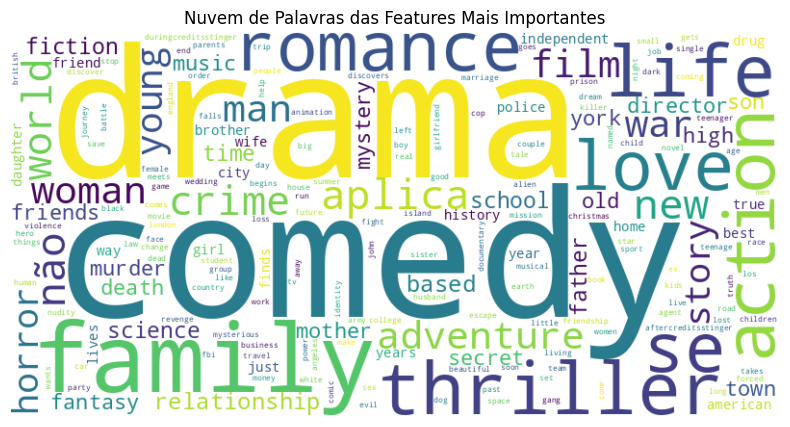

In [ ]:
# É necessário instalar a biblioteca wordcloud
# pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Geração da Nuvem de Palavras ---

# O vetorizador tfidf já foi treinado na célula anterior
# Vamos somar os scores TF-IDF de cada palavra (feature) em todos os filmes
# Isso nos dá uma medida geral da importância de cada palavra
feature_scores = tfidf_matrix.sum(axis=0).tolist()[0]
feature_names = tfidf.get_feature_names_out()

# Criamos um dicionário de 'palavra': score
word_scores = dict(zip(feature_names, feature_scores))

# Criando o objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

# Plotando a imagem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Features Mais Importantes')
plt.savefig('wordcloud_features.png')
plt.show()

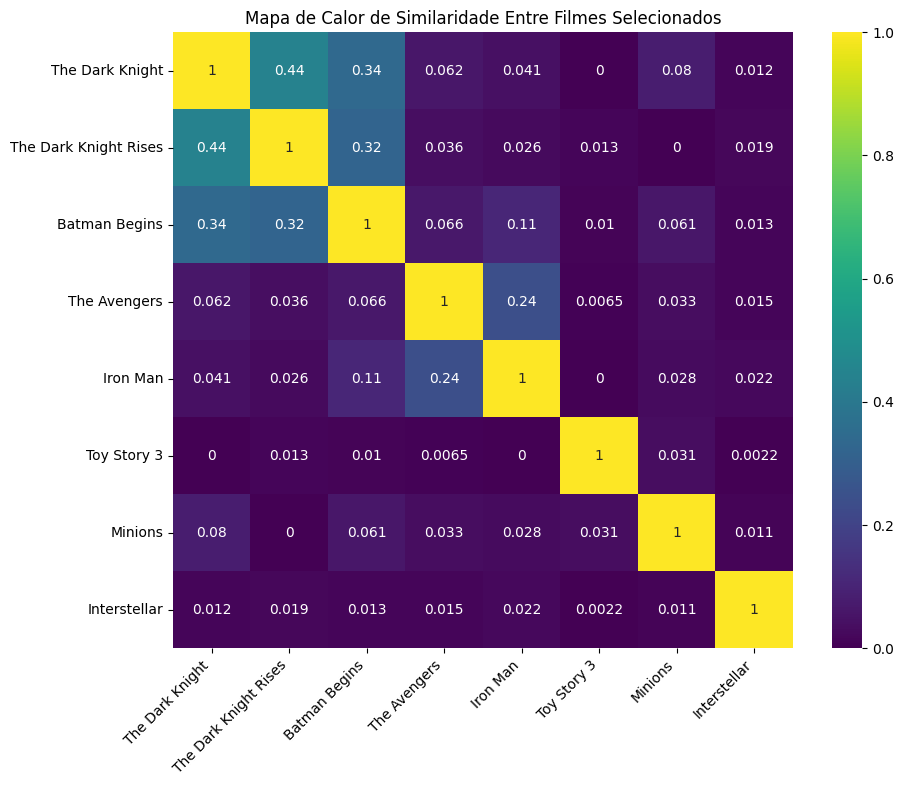

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Geração do Mapa de Calor de Similaridade ---

# 1. Selecionamos uma lista de filmes para comparar
filmes_selecionados = [
    'The Dark Knight',
    'The Dark Knight Rises',
    'Batman Begins',
    'The Avengers',
    'Iron Man',
    'Toy Story 3',
    'Minions',
    'Interstellar'
]

# Filtra a lista para garantir que todos os filmes existem no nosso dataset
filmes_existentes = [filme for filme in filmes_selecionados if filme in indices]
indices_selecionados = [indices[filme] for filme in filmes_existentes]

# 2. Extraímos a sub-matriz de similaridade para esses filmes
sub_matrix_sim = cosine_sim[np.ix_(indices_selecionados, indices_selecionados)]

# 3. Criamos o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    sub_matrix_sim,
    annot=True, # Mostra os valores de similaridade nas células
    cmap='viridis', # Esquema de cores
    xticklabels=filmes_existentes,
    yticklabels=filmes_existentes
)
plt.title('Mapa de Calor de Similaridade Entre Filmes Selecionados')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('heatmap_similaridade.png')
plt.show()

# Streamlit


In [ ]:
!pip install streamlit pyngrok

In [ ]:
from pyngrok import ngrok #biblioteca que serve para criar uma rede de conexão entre a minha máquina e a internet, permitindo rodar o app
ngrok.set_auth_token('2zvutG8V1djDOFpsoIU70IC67Q3_5JGKC1BrtJmQh4MNQYY1q')

In [ ]:
%%writefile app.py
#essa linha acima serve para salvar o arquivo como app.py

import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Função para carregar e processar os dados --- Só copiei do código do Renan
@st.cache_data #Salva os dados da função executada logo abaixo na memória cache, facilitando a leitura dos dados
def carregar_dados_e_modelo():
    caminho_arquivo = 'dados_filmes_limpo_e_focado.xlsx'
    df = pd.read_excel(caminho_arquivo) # le a planilha ajustada

    for feature in ['GENRES', 'KEYWORDS', 'TAGLINE', 'OVERVIEW']:
        df[feature] = df[feature].fillna('') #completa os espaços vazios

    df['combined_features'] = df['GENRES'] + ' ' + df['KEYWORDS'] + ' ' + df['TAGLINE'] + ' ' + df['OVERVIEW'] #Cria uma nova coluna juntando os textos de várias colunas em uma só, para formar uma descrição completa do filme.

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['combined_features'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) #Calcula a similaridade cosseno entre os filmes, gerando uma matriz onde cada elemento diz o quanto dois filmes são semelhantes (de 0 a 1)
    indices = pd.Series(df.index, index=df['TITLE']).drop_duplicates() #Cria uma estrutura para buscar o índice do filme a partir do seu título.
    return df, cosine_sim, indices

# --- Importando a API das imagens dos filmes

import requests

def get_movie_poster_url(title):
    try:
        api_key = "1457c1b88a022fe3b44f8afc1860d9b9"
        query = title.replace(" ", "%20")
        url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={query}"

        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data["results"]:
                poster_path = data["results"][0]["poster_path"]
                poster_url = f"https://image.tmdb.org/t/p/w500{poster_path}"
                return poster_url
            else:
                return None
        else:
            return None
    except Exception as e:
        print("Erro ao buscar poster:", e)
        return None


# --- Interface Principal do Aplicativo ---
try:
    df, cosine_sim, indices = carregar_dados_e_modelo()

    st.set_page_config(page_title="LigaDs", layout="centered")
    st.title("🎬 Bem-vindo ao recomendador de filmes da LigaDs!")

    filme_selecionado = st.selectbox(
        "Escolha um filme da lista:",
        options=df['TITLE'].sort_values().unique(),
        index=None,
        placeholder="🔍 Digite o nome do filme..."
    )

    poster_url = get_movie_poster_url(filme_selecionado)

    def recomendar_filmes(titulo, cosine_sim=cosine_sim, df=df, indices=indices, n=9):
      idx = indices[titulo]
      sim_scores = list(enumerate(cosine_sim[idx]))
      sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]  # ignora o primeiro (ele mesmo)
      movie_indices = [i[0] for i in sim_scores]
      return df.iloc[movie_indices][['TITLE']]

    if st.button("Recomendar filmes") and filme_selecionado:
        st.subheader("Filmes recomendados:")
        recomendados = recomendar_filmes(filme_selecionado)

        for i in range(0, len(recomendados), 3):  # 3 colunas por linha
            linha = recomendados.iloc[i:i+3]
            cols = st.columns(3)

            for col, (_, row) in zip(cols, linha.iterrows()):
                titulo = row['TITLE']
                descricao = df.loc[df['TITLE'] == titulo, 'OVERVIEW'].values[0]
                poster_url = get_movie_poster_url(titulo)

                with col:
                    if poster_url:
                        descricao_limitada = descricao[:300]
                        card_html = f"""
                        <div style="
                            display: flex;
                            flex-direction: column;
                            justify-content: space-between;
                            border: 1px solid #ccc;
                            border-radius: 10px;
                            padding: 12px;
                            width: 100%;
                            height: 550px;
                            max-width: 380px;
                            margin: 0 auto 20px auto;
                            box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1);
                            background-color: #fdfdfd;
                        ">
                            <img src="{poster_url}" alt="{titulo}" style="width: 100%; height: 350px; object-fit: cover; border-radius: 8px;">
                            <div style="margin-top: 10px;">
                                <h4 style="margin: 0; font-size: 18px; color: #333;">{titulo}</h4>
                                <p style="
                                    font-size: 14px;
                                    color: #666;
                                    text-align: justify;
                                    overflow: hidden;
                                    text-overflow: ellipsis;
                                    display: -webkit-box;
                                    -webkit-line-clamp: 4;
                                    -webkit-box-orient: vertical;
                                    height: 72px;
                                ">
                                    {descricao_limitada}
                                </p>
                            </div>
                        </div>
                        """
                        st.markdown(card_html, unsafe_allow_html=True)
                    else:
                        st.write(titulo)
                        st.warning("Imagem não encontrada.")


except FileNotFoundError:
    st.error("ERRO: Arquivo 'dados_filmes_limpo_e_focado.xlsx' não foi encontrado.")
    st.info("Por favor, execute o PASSO 1 e faça o upload do arquivo para o Colab.")

Overwriting app.py


In [ ]:
from pyngrok import ngrok
import subprocess

# Mata ngrok antigo, se existir
!kill -9 $(pgrep ngrok) 2>/dev/null

# Cria o túnel na porta 8501
public_url = ngrok.connect(8501)
print(f"✅ Seu aplicativo está no ar! Acesse: {public_url}")

# Inicia o Streamlit em background
process = subprocess.Popen(["streamlit", "run", "app.py"])


✅ Seu aplicativo está no ar! Acesse: NgrokTunnel: "https://4c364afc574e.ngrok-free.app" -> "http://localhost:8501"
